# Recent image

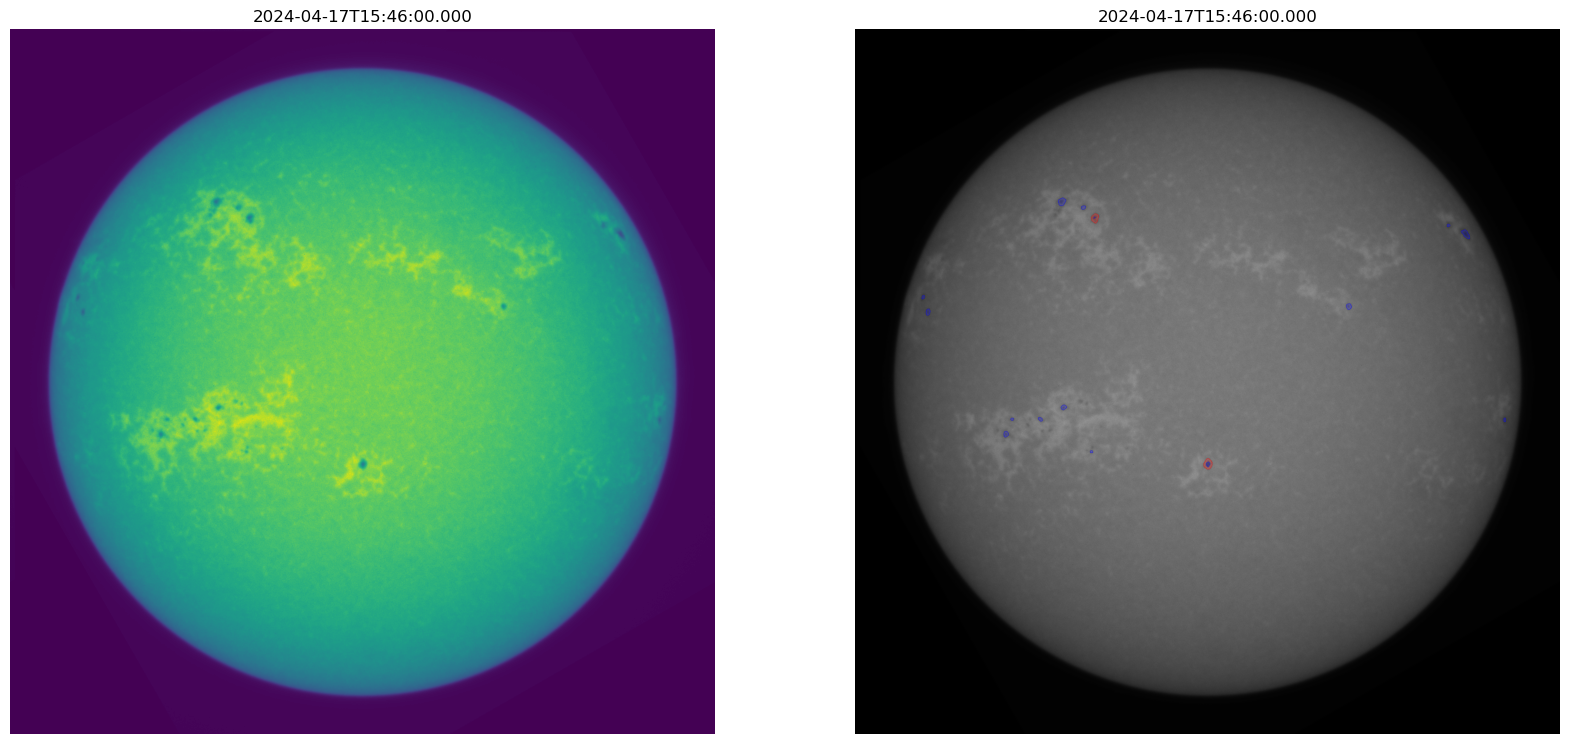

In [5]:
from module import toSunpyMap, getMostRecent, drawSunspots
import matplotlib.pyplot as plt

directory = 'Z:/data/CLIMSO/2024/data_calibrated'

file = getMostRecent(directory, '_l2_')

map = toSunpyMap(file, center_disk=True)

img = drawSunspots(map)

plt.figure(figsize=(20,20))

plt.subplot(121)
plt.imshow(map.data, origin='lower')
plt.axis('off')
plt.title(map.date);

plt.subplot(122)
plt.imshow(img, origin='lower')
plt.axis('off')
plt.title(map.date);

In [6]:
from module import groupSunspots, assignNOAAToTable

table = groupSunspots(map)

table = assignNOAAToTable(table, map)

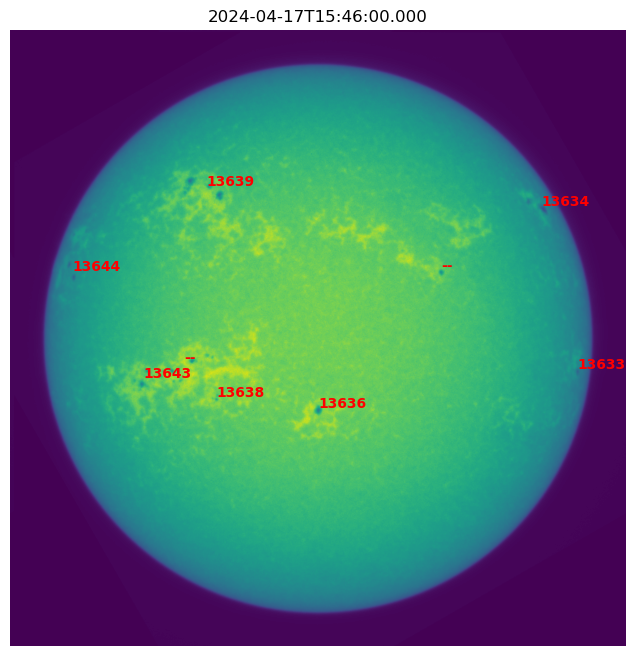

In [7]:
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection=map)
plt.imshow(map.data, axes=ax, origin='lower')
plt.axis('off')
plt.title(map.date);

for region in table:
    ax.plot_coord(SkyCoord(region['longitude'],
                region['latitude'], 
                obstime=map.date,
                observer='earth', 
                frame=frames.HeliographicStonyhurst,
                ).transform_to(map.coordinate_frame), '')
    ax.annotate( region['noaa'],
                (region['longitude'].value, region['latitude'].value),
                xycoords=ax.get_transform('heliographic_stonyhurst'),
                color='red',
                fontweight='bold',
                horizontalalignment='left', verticalalignment='bottom')


In [8]:
table

label,id,noaa,longitude,latitude,x,y
,,,deg,deg,pix,pix
uint16,int32,int32,float64,float64,float64,float64
1,--,13636,0.06785477658172015,-20.848793737100465,1025.0,783.0
2,--,13638,-23.179603382704215,-18.074022607108557,686.0,819.0
3,--,13643,-41.480185357752475,-13.232891562301546,442.0,880.0
4,--,13633,75.46545128192516,-8.59172032172903,1886.0,911.0
5,--,--,-29.980907752798487,-10.3245659125754,580.0,935.0
6,--,13644,-67.78588187872919,11.622991949373766,207.0,1236.0
7,--,--,27.375670955048026,9.136547997148256,1434.0,1241.0
8,--,13634,67.32180624011922,26.624349078598573,1767.0,1455.0
